In [1]:
# nullmodel 
import numpy as np
import pandas as pd
import os
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print(os.listdir("C:/Users/KangMin/Desktop/2021 DS/PJ2"))
        
test = pd.read_csv("C:/Users/KangMin/Desktop/2021 DS/PJ2/test.csv")
submission = pd.read_csv("C:/Users/KangMin/Desktop/2021 DS/PJ2/sample_submission.csv")

['sample_submission.csv', 'sample_submission.csv.zip', 'test.csv', 'test.csv.zip', 'test_answers.csv', 'train.csv', 'train.csv.zip']


In [2]:
train = pd.read_csv("C:/Users/KangMin/Desktop/2021 DS/PJ2/train.csv")

In [3]:
train_roll =train.rolling(40).mean().iloc[100::60]
train_roll.reset_index(drop=True, inplace=True)


In [4]:
# corr가 최대가 되도록 pull . pull의 결과가 train2, label2   by 세훈님

train2 = train.copy()
x_cols = ['s'+ str(i) for i in list(range(1,17,1))]
train2['s1'] =train2['s1'].shift(periods= -93*50)
train2['s2'] =train2['s2'].shift(periods= -89*50)
train2['s3'] =train2['s3'].shift(periods= -51*50)
train2['s4'] =train2['s4'].shift(periods= -52*50)
train2['s5'] =train2['s5'].shift(periods= -43*50)
train2['s6'] =train2['s6'].shift(periods= -41*50)
train2['s7'] =train2['s7'].shift(periods= -44*50)
train2['s8'] =train2['s8'].shift(periods= -44*50)
train2['s9'] =train2['s9'].shift(periods= -99*50)
train2['s10'] =train2['s10'].shift(periods= -102*50)
train2['s11'] =train2['s11'].shift(periods= -55*50)
train2['s12'] =train2['s12'].shift(periods= -52*50)
train2['s13'] =train2['s13'].shift(periods= -46*50)
train2['s14'] =train2['s14'].shift(periods= -45*50)
train2['s15'] =train2['s15'].shift(periods= -44*50)
train2['s16'] =train2['s16'].shift(periods= -44*50)

train2 = train2.dropna( how = "any")
label2 = train2['label']
train2 = train2.drop(['label'], axis=1)
train2.corr()

,id,time,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16
id,1.000000,1.000000,-0.225425,-0.399170,0.008332,-0.003473,-0.311450,-0.371605,-0.017055,-0.007038,0.475185,0.367597,0.109704,0.062749,-0.588975,-0.431600,0.102877,0.062617
time,1.000000,1.000000,-0.225438,-0.399171,0.008318,-0.003487,-0.311466,-0.371620,-0.017068,-0.007052,0.475179,0.367586,0.109691,0.062736,-0.588991,-0.431618,0.102865,0.062605
s1,-0.225425,-0.225438,1.000000,0.076355,0.468400,0.503260,0.783673,0.842394,0.482600,0.477696,0.621517,0.715590,0.438849,0.511346,0.796151,0.813181,0.358609,0.553186
s2,-0.399170,-0.399171,0.076355,1.000000,-0.054239,-0.043830,0.152409,0.207358,-0.047541,-0.052115,-0.402274,-0.363186,-0.096225,-0.066325,0.305812,0.185716,-0.091933,-0.070942
s3,0.008332,0.008318,0.468400,-0.054239,1.000000,0.998938,0.858318,0.762195,0.997234,0.997593,0.488599,0.521760,0.992907,0.994455,0.634285,0.779707,0.987970,0.988479
s4,-0.003473,-0.003487,0.503260,-0.043830,0.998938,1.000000,0.876650,0.785088,0.997038,0.997330,0.503111,0.540016,0.990691,0.995434,0.658206,0.800686,0.982161,0.991684
s5,-0.311450,-0.311466,0.783673,0.152409,0.858318,0.876650,1.000000,0.983789,0.872005,0.866800,0.430451,0.520271,0.813971,0.861562,0.925260,0.982740,0.779844,0.878517
s6,-0.371605,-0.371620,0.842394,0.207358,0.762195,0.785088,0.983789,1.000000,0.779292,0.772084,0.397821,0.497215,0.711291,0.772148,0.959845,0.985997,0.667650,0.795145
s7,-0.017055,-0.017068,0.482600,-0.047541,0.997234,0.997038,0.872005,0.779292,1.000000,0.999710,0.485268,0.521565,0.986363,0.990835,0.654248,0.795751,0.983450,0.988906
s8,-0.007038,-0.007052,0.477696,-0.052115,0.997593,0.997330,0.866800,0.772084,0.999710,1.000000,0.490622,0.525398,0.988286,0.991575,0.645046,0.788952,0.985463,0.989349


In [5]:
# train_new : 선형결합으로 corr 최대화 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

lm_model = LinearRegression()
lm_model.fit(train2, label2)
train_new = lm_model.predict(train2)

np.corrcoef(train_new, label2)

array([[1.        , 0.93871841],
       [0.93871841, 1.        ]])

In [6]:
# 50개씩 묶음
train2 =train2.rolling(40).mean().iloc[100::50]
label2 =label2.rolling(40).mean().iloc[100::50]

,id,time,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16
100,80.5,0.80050,1806.15500,-9.41150,1503.26325,1724.35075,1920.81400,2640.67650,2131.83950,2217.39350,521.45950,634.27675,1949.34650,2110.25350,1302.69350,1265.10425,1979.28200,1912.31475
150,130.5,1.30200,1799.77000,-8.21275,1504.82150,1723.01400,1912.09575,2627.15800,2129.81950,2210.02850,519.41950,630.57050,1945.50075,2103.26225,1298.05500,1259.01475,1977.60775,1906.73500
200,180.5,1.80200,1794.86600,-9.69175,1505.92775,1719.41100,1902.88825,2610.73225,2122.39950,2194.40700,517.76700,625.71775,1940.19025,2100.74225,1294.68600,1253.67150,1972.42400,1901.07275
250,230.5,2.30200,1788.76025,-8.73200,1501.70125,1717.87725,1892.47400,2596.76175,2115.71675,2185.02525,518.05200,624.46350,1933.87500,2092.59250,1287.44375,1245.59025,1967.91300,1895.77825
300,280.5,2.80200,1783.29025,-10.08850,1498.66200,1714.31425,1880.02375,2581.80950,2104.95975,2168.91250,513.74100,624.01800,1932.73300,2087.68150,1284.91400,1242.74075,1961.81925,1890.28500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361300,3361280.5,33617.76575,1545.05800,-3.81950,5372.83725,5787.97350,1818.61650,2034.46600,6099.52975,6501.39225,1124.79700,1141.32050,6233.30875,4827.49575,835.54450,976.44775,7062.70975,5162.82750
3361350,3361330.5,33618.26575,1543.52400,-4.74725,5370.26825,5779.91825,1820.74100,2033.76950,6099.37075,6496.31400,1121.71625,1139.49400,6228.61650,4829.77400,836.23950,976.18750,7059.34450,5161.79825
3361400,3361380.5,33618.76575,1546.13425,-3.15100,5367.63850,5782.39650,1824.23800,2033.54725,6100.17950,6496.36950,1127.70900,1140.56575,6225.21800,4820.83825,832.67825,978.02050,7056.52600,5158.35675
3361450,3361430.5,33619.26575,1543.95475,-6.08025,5364.69900,5776.86900,1820.59750,2032.09700,6099.87875,6491.83100,1125.20425,1142.27625,6220.72575,4820.58950,836.75400,978.10350,7053.16500,5157.52400


In [7]:
# 묶으니 조금 더 결과 잘 나옴. Lasso, Ridge, Elasticnet은 더 결과 안좋음. train_new가 현재 최종
lm_model = LinearRegression()
lm_model.fit(train2, label2)
train_new = lm_model.predict(train2)
np.corrcoef(train_new, label2)

array([[1.        , 0.94099685],
       [0.94099685, 1.        ]])

In [8]:

label2.reset_index(drop=True, inplace=True)

In [25]:
train2.reset_index(drop=True, inplace=True)

In [26]:
co_data = pd.concat([train2, label2], axis=1)
co_data

,id,time,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,label
0,80.5,0.80050,1806.15500,-9.41150,1503.26325,1724.35075,1920.81400,2640.67650,2131.83950,2217.39350,521.45950,634.27675,1949.34650,2110.25350,1302.69350,1265.10425,1979.28200,1912.31475,0.0
1,130.5,1.30200,1799.77000,-8.21275,1504.82150,1723.01400,1912.09575,2627.15800,2129.81950,2210.02850,519.41950,630.57050,1945.50075,2103.26225,1298.05500,1259.01475,1977.60775,1906.73500,0.0
2,180.5,1.80200,1794.86600,-9.69175,1505.92775,1719.41100,1902.88825,2610.73225,2122.39950,2194.40700,517.76700,625.71775,1940.19025,2100.74225,1294.68600,1253.67150,1972.42400,1901.07275,0.0
3,230.5,2.30200,1788.76025,-8.73200,1501.70125,1717.87725,1892.47400,2596.76175,2115.71675,2185.02525,518.05200,624.46350,1933.87500,2092.59250,1287.44375,1245.59025,1967.91300,1895.77825,0.0
4,280.5,2.80200,1783.29025,-10.08850,1498.66200,1714.31425,1880.02375,2581.80950,2104.95975,2168.91250,513.74100,624.01800,1932.73300,2087.68150,1284.91400,1242.74075,1961.81925,1890.28500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67224,3361280.5,33617.76575,1545.05800,-3.81950,5372.83725,5787.97350,1818.61650,2034.46600,6099.52975,6501.39225,1124.79700,1141.32050,6233.30875,4827.49575,835.54450,976.44775,7062.70975,5162.82750,0.0
67225,3361330.5,33618.26575,1543.52400,-4.74725,5370.26825,5779.91825,1820.74100,2033.76950,6099.37075,6496.31400,1121.71625,1139.49400,6228.61650,4829.77400,836.23950,976.18750,7059.34450,5161.79825,0.0
67226,3361380.5,33618.76575,1546.13425,-3.15100,5367.63850,5782.39650,1824.23800,2033.54725,6100.17950,6496.36950,1127.70900,1140.56575,6225.21800,4820.83825,832.67825,978.02050,7056.52600,5158.35675,0.0
67227,3361430.5,33619.26575,1543.95475,-6.08025,5364.69900,5776.86900,1820.59750,2032.09700,6099.87875,6491.83100,1125.20425,1142.27625,6220.72575,4820.58950,836.75400,978.10350,7053.16500,5157.52400,0.0


In [27]:
#####지원님 코드 - CO 들어갔는지 예측

y = []
for i in range(co_data.shape[0]):
    y.append(i)
    if(co_data['label'][i] == 0) : 
        y[i] = 0
    elif(co_data['label'][i] != 0) : 
        y[i] = 1
co_data['CO_in'] = y
co_data['CO_in'].value_counts()


0    38256
1    28973
Name: CO_in, dtype: int64

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

x = co_data[x_cols]
y = co_data[['CO_in']]
y = y.astype('int64')
plt.figure(figsize = (16, 7))
model = ExtraTreesClassifier()
model.fit(x, y)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

<Figure size 1152x504 with 0 Axes>

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y)
y = y.astype('int64')
model = ExtraTreesClassifier()
model.fit(x_train, y_train)

prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

#0.997 정도의 정확성

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9973227034745359


In [42]:
prediction2 = model.predict(x)
prediction2[0]

0

array([139.24945773, 135.45386152, 131.36671479, ...,  17.10256662,
        13.86158275,  15.26596869])

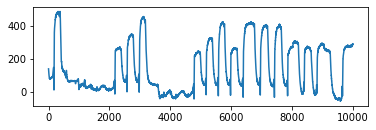

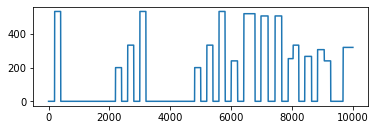

array([[1.        , 0.94099685],
       [0.94099685, 1.        ]])

In [41]:
plt.subplot(211)
plt.plot(train_new[0:10000])
plt.show()
plt.subplot(212)
plt.plot(label2[0:10000])
plt.show()

In [46]:
train_new2 = train_new.copy()
for i in range(len(train_new2)):
    if prediction2[i]==0 : 
        train_new2[i] = 0

        
    

In [48]:
# 센서 최종본
np.corrcoef(train_new2, label2)

array([[1.       , 0.9792527],
       [0.9792527, 1.       ]])

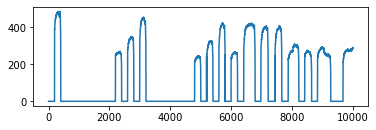

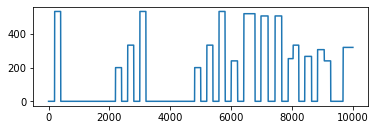

In [49]:
plt.subplot(211)
plt.plot(train_new2[0:10000])
plt.show()
plt.subplot(212)
plt.plot(label2[0:10000])
plt.show()

MAE: 0.10481257558541288


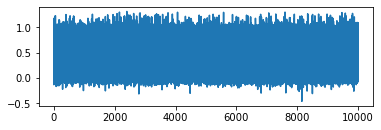

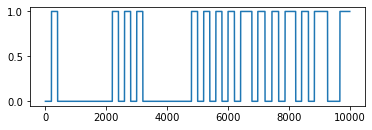

In [50]:
#################################################################### 여기부터는 다시 해야함


from sklearn.metrics import mean_absolute_error

lm_model = LinearRegression()
lm_model.fit(x_train, y_train)
test_preds = lm_model.predict(x_test)

print('MAE: {}'.format(mean_absolute_error(y_test, test_preds)))

plt.subplot(211)
plt.plot(test_preds[0:10000])
plt.show()
plt.subplot(212)
plt.plot(y[0:10000])
plt.show()

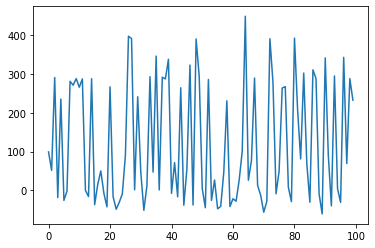

In [144]:
plt.plot(test_preds[0:100])


In [ ]:
new_X = test[x_cols]
new_y = lm_model.predict(new_X)
submission_lm = submission.copy()
submission_lm['label'] = new_y
submission_lm.head()
submission_lm.to_csv('submission_lm.csv', index=False)